In [158]:
import pandas as pd
import matplotlib.pyplot as plt

# Załadowanie danych
police_incidents_url = 'https://uploads.kodilla.com/bootcamp/pro-data-visualization/files/fatal-police-shootings-data.csv'
df_police_incidents = pd.read_csv(police_incidents_url)

# Zmiana typów danych w źródłowych df
df_police_incidents['date'] = pd.to_datetime(df_police_incidents['date'])

# Zmiana nazwy kolumny
df_police_incidents = df_police_incidents.rename(columns={'state': 'state_id'})
df_police_incidents

,id,name,date,manner_of_death,armed,age,gender,race,city,state_id,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


2. Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).

In [159]:
# Tworzenie tabeli przestawnej
pivot_table = df_police_incidents.pivot_table(
    values="id",
    index="race",
    columns="signs_of_mental_illness",
    aggfunc="count",
    fill_value=0
)

pivot_table

signs_of_mental_illness,False,True
race,,
A,69,24
B,1114,184
H,745,157
N,64,14
O,37,11
W,1763,713


3. Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.

In [160]:
# Obliczanie sumy przypadków dla każdej rasy
pivot_table['total'] = pivot_table.apply(lambda row: row.sum(), axis=1)

In [161]:
# Obliczanie odsetka przypadków z oznakami choroby psychicznej
pivot_table['mental_illness_perc'] = (pivot_table.apply(lambda row: (row[True] / row['total']) * 100, axis=1)).round(2)
pivot_table

signs_of_mental_illness,False,True,total,mental_illness_perc
race,,,,
A,69,24,93,25.81
B,1114,184,1298,14.18
H,745,157,902,17.41
N,64,14,78,17.95
O,37,11,48,22.92
W,1763,713,2476,28.80


In [162]:
# Znalezienie rasy z największym odsetkiem przypadków choroby psychicznej
max_percentage_race = pivot_table['mental_illness_perc'].idxmax()
max_percentage_value = pivot_table['mental_illness_perc'].max()

print(f"Rasa z największym odsetkiem: {max_percentage_race}, Odsetek: {max_percentage_value:.2f}%")

Rasa z największym odsetkiem: W, Odsetek: 28.80%


4. Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

In [163]:
# Dodanie do tabeli df_police_incidents dnia tygodnia w którym doszło do interwencji
df_police_incidents['day_of_incident'] = df_police_incidents['date'].dt.day_name()
df_police_incidents.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state_id,signs_of_mental_illness,threat_level,flee,body_camera,day_of_incident
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Friday
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Friday
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Saturday
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Sunday
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Sunday


In [164]:
# Zliczenie interwencji według dnia tygodnia
day_counts = df_police_incidents['day_of_incident'].value_counts()

# Uszeregowanie dni tygodnia
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts.reindex(ordered_days)

day_counts

day_of_incident
Monday       726
Tuesday      816
Wednesday    829
Thursday     810
Friday       761
Saturday     721
Sunday       753
Name: count, dtype: int64

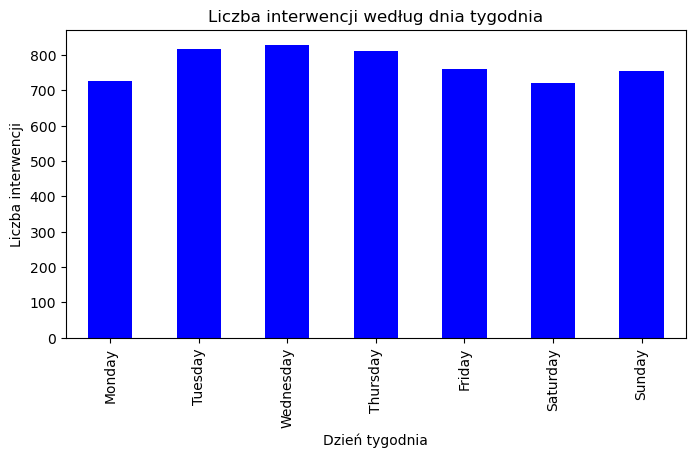

In [165]:
# Wykres kolumnowy
day_counts.plot(kind='bar', color='blue', figsize=(8, 4))
plt.title("Liczba interwencji według dnia tygodnia")
plt.xlabel("Dzień tygodnia")
plt.ylabel("Liczba interwencji")
plt.xticks(rotation=90)
plt.show()

5. Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.

In [166]:
# Załadowanie danych

population_url = 'https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population'
states_url = 'https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations'

table_population = pd.read_html(population_url)
df_population = table_population[0]

table_states = pd.read_html(states_url)
df_states = table_states[1]

In [167]:
# Pryzgotowanie tabeli df_state_clean

df_states_clean = df_states[[('Name', 'Name'),('USPS', 'Unnamed: 5_level_1')]]
df_states_clean.columns = df_states_clean.columns.get_level_values(0)
df_states_clean.columns = ['State', 'state_id']

In [168]:
# Pośrednie połączenie tabel

df_merged = pd.merge(df_population, df_states_clean, on='State')

In [169]:
# Finalna tabela z liczbą incydentów na w przeliczeniu na 1000 mieszkańców w poszczególnych stanach

per_state_counts = df_police_incidents['state_id'].value_counts()
df_selected = df_merged[['state_id', 'Census population, April 1, 2020 [1][2]']]
df_final = pd.merge(per_state_counts, df_selected, on='state_id')
df_final= df_final.rename(columns={'Census population, April 1, 2020 [1][2]': 'population'})
df_final['incidents_per_1000'] = (df_final.apply(lambda row: (row['count'] / row['population']) * 1000, axis=1)).round(4)
df_final

,state_id,count,population,incidents_per_1000
0,CA,799,39538223,0.0202
1,TX,481,30145505,0.0160
2,FL,350,21538187,0.0163
3,AZ,254,7151502,0.0355
4,CO,195,5773714,0.0338
5,GA,182,10711908,0.0170
6,OK,164,3959353,0.0414
7,NC,156,10439388,0.0149
8,OH,155,11799448,0.0131
9,WA,152,7705281,0.0197
